In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import tensorflow as tf

from src.DataPreprocessor.data_preprocessor import DataPreprocessor, Mode
from src.LearningKeras.net_architecture import cnn_150x150x5
from src.LearningKeras.train import KerasTrainer

from tqdm import trange

np.random.seed(1)
tf.set_random_seed(2)

# Data

In [2]:
from src.DataPreprocessor.DataIOBackend.gdal_backend import GdalBackend
from src.DataPreprocessor.data_visualiser import DataVisualiser

dataiobackend = GdalBackend()
data_preprocessor = DataPreprocessor(data_dir="data/Region 1 - Lopukangri/",
                              backend=dataiobackend,
                              filename_prefix="tibet",
                              mode=Mode.TRAIN,
                              seed=1)

In [3]:
data_visualiser = DataVisualiser(data_preprocessor)

#### RGB optical image with mask of labelled areas:
* red - faults
* green - fault lookalikes - "features that we think share visual or topographic similarity with faults, but expert interpretation can exclude"
* blue - not-faults - "areas that definitely do not include faults, nor things that we think even look like faults, can be used directly for training what faults are not."
 

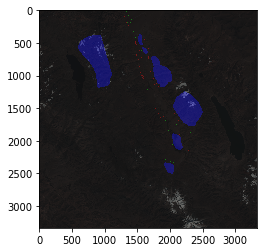

In [4]:
plt.imshow(data_visualiser.get_optical_rgb_with_features_mask(opacity=90))

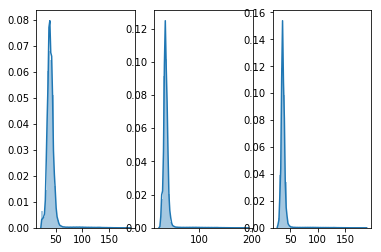

In [7]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.distplot(data_preprocessor.optical_rgb[:, :, 0].flatten(), ax=ax1) # r channel
sns.distplot(data_preprocessor.optical_rgb[:, :, 1].flatten(), ax=ax2) # g channel
sns.distplot(data_preprocessor.optical_rgb[:, :, 2].flatten(), ax=ax3) # b channel

#### Elevation

elevation map (from the Shuttle Radar Topography Mission), values in meters above sea level

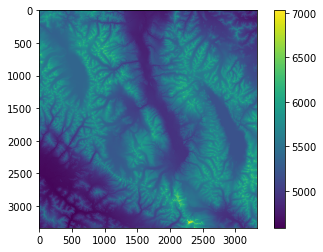

In [8]:
plt.imshow(data_preprocessor.elevation)
plt.colorbar()

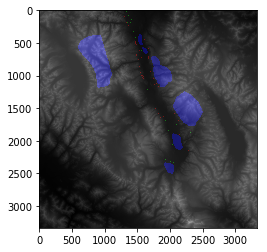

In [4]:
plt.imshow(data_visualiser.get_elevation_with_features_mask(opacity=90))

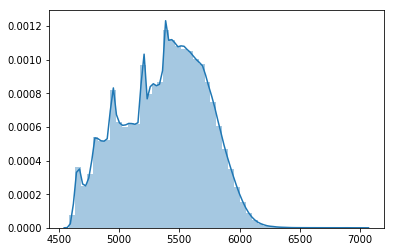

In [9]:
sns.distplot(data_preprocessor.elevation.flatten())

#### Slope

slope map derived from the elevation, values in degrees from horizontal, 0-90

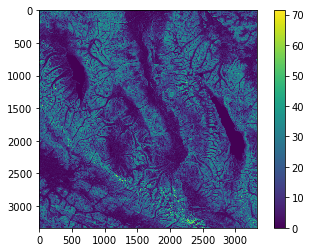

In [5]:
plt.imshow(data_preprocessor.slope)
plt.colorbar()

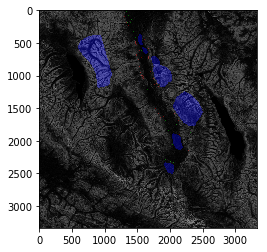

In [6]:
plt.imshow(data_visualiser.get_slope_with_features_mask(opacity=90))

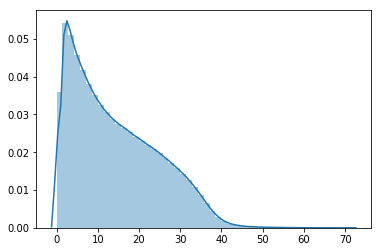

In [7]:
sns.distplot(data_preprocessor.slope.flatten())

### Normalisation

/home/olga/VirtualEnv/VirtualEnv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


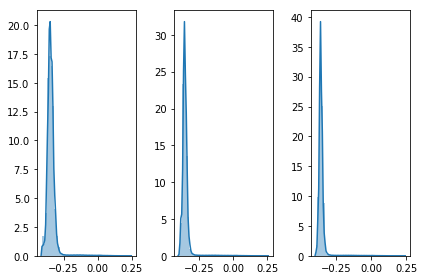

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.distplot(data_preprocessor.normalised_optical_rgb[:, :, 0].flatten(), ax=ax1) # r channel
sns.distplot(data_preprocessor.normalised_optical_rgb[:, :, 1].flatten(), ax=ax2) # g channel
sns.distplot(data_preprocessor.normalised_optical_rgb[:, :, 2].flatten(), ax=ax3) # b channel
plt.tight_layout()

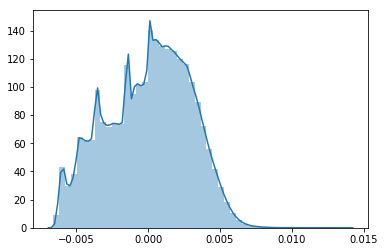

In [4]:
sns.distplot(data_preprocessor.normalised_elevation.flatten())

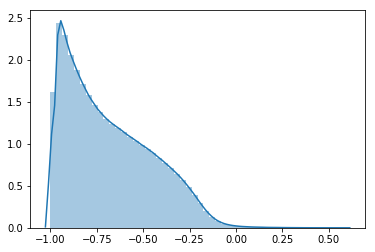

In [5]:
sns.distplot(data_preprocessor.normalised_slope.flatten())

## Examples of patches

In [5]:
num_patches = 7
patch_size = (150, 150)
bands = 5

### Examples of fault patches

In [6]:
patches = np.zeros((num_patches, patch_size[0], patch_size[1], bands))
for i in range(num_patches):
    patches[i] = data_preprocessor.sample_fault_patch(patch_size=patch_size)

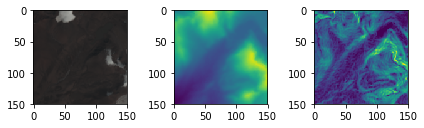

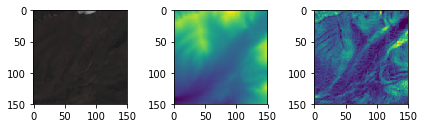

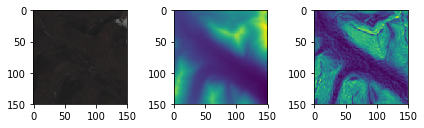

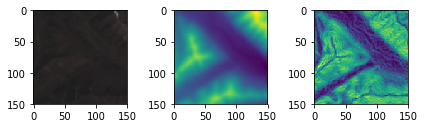

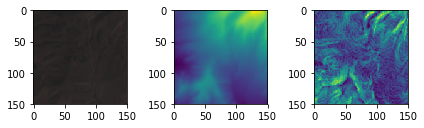

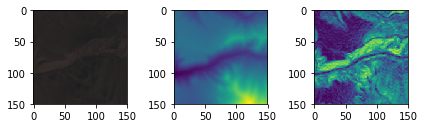

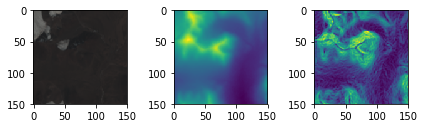

In [12]:
for i in range(num_patches):
    cur_patch = patches[i]
    rgb, elevation, slope = data_preprocessor.denormalise(cur_patch)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(rgb)
    ax2.imshow(elevation)
    ax3.imshow(slope)
    plt.tight_layout()
plt.show()

### Examples of fault lookalike patches

In [8]:
patches = np.zeros((num_patches, patch_size[0], patch_size[1], bands))
for i in range(num_patches):
    patches[i] = data_preprocessor.sample_fault_lookalike_patch(patch_size)

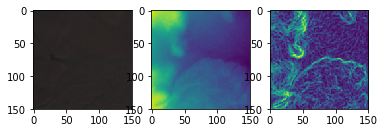

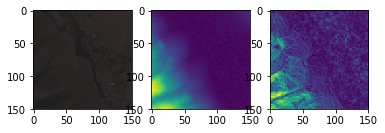

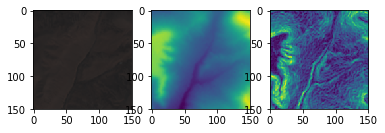

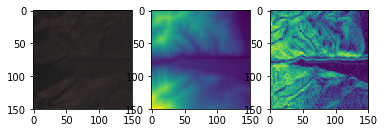

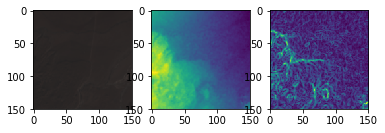

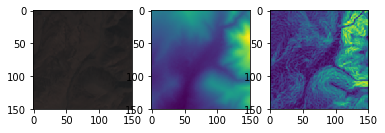

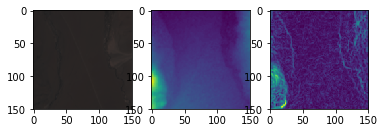

In [9]:
for i in range(num_patches):
    cur_patch = patches[i]
    rgb, elevation, slope = data_preprocessor.denormalise(cur_patch)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(rgb)
    ax2.imshow(elevation)
    ax3.imshow(slope)
    plt.tight_layout()
plt.show()

### Examples of nonfault patches

In [10]:
patches = np.zeros((num_patches, patch_size[0], patch_size[1], bands))
for i in range(num_patches):
    patches[i] = data_preprocessor.sample_nonfault_patch(patch_size)

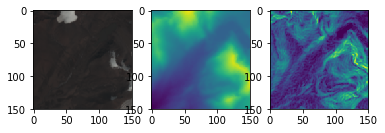

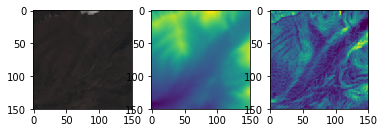

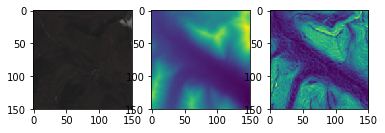

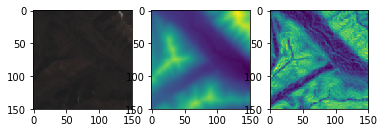

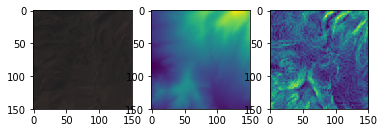

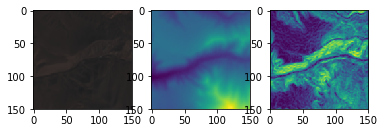

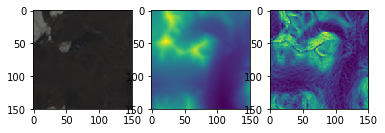

In [11]:
for i in range(num_patches):
    cur_patch = patches[i]
    rgb, elevation, slope = data_preprocessor.denormalise(cur_patch)
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.imshow(rgb)
    ax2.imshow(elevation)
    ax3.imshow(slope)
    plt.tight_layout()
plt.show()